# *Mall Customer-Segementation-Data : Market Basket Analysis*

K-Means Clusterning and Hierarchial Clustering Implementation in Customer Segmentation

In [1]:
## Importing Required Libraries

import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# For interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [3]:
# importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
# Check the shape(Rows and Columns) of the dataset
dataset.shape

(200, 5)

In [5]:
# First five observations
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Information of the datasets
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Genre'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Genre'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


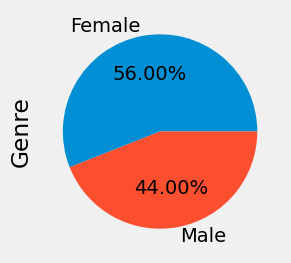

In [8]:
plt.figure(figsize=(3,3))
pd.Series(dataset['Genre']).value_counts().plot(kind ='pie', autopct='%1.2f%%')
plt.show()

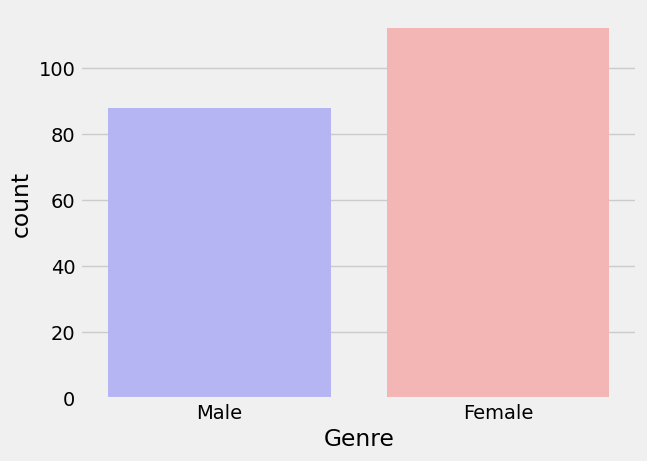

In [9]:
sns.countplot(x='Genre',data = dataset , palette = 'bwr')
plt.show()

In [10]:
dataset['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [11]:
dataset.groupby('Genre').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


*Annual Income with Spending Score forms together an interesting picture,look at it later.*

*Age and Annual Income distribution don't seems like normal. They are both shifted to left. Spending Score, at first glance, has too large tails to be normal. But remember, that these conclusions based on histograms, and they can change very high by switch number of bins. So, plot in addition kdeplot from seaborn*

**Checking for Missing Values**

In [12]:
# Checking for any Missing values

missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,CustomerID,0,100.0
1,Genre,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


**Plotting the Annual Income Column vs the Spending Score**

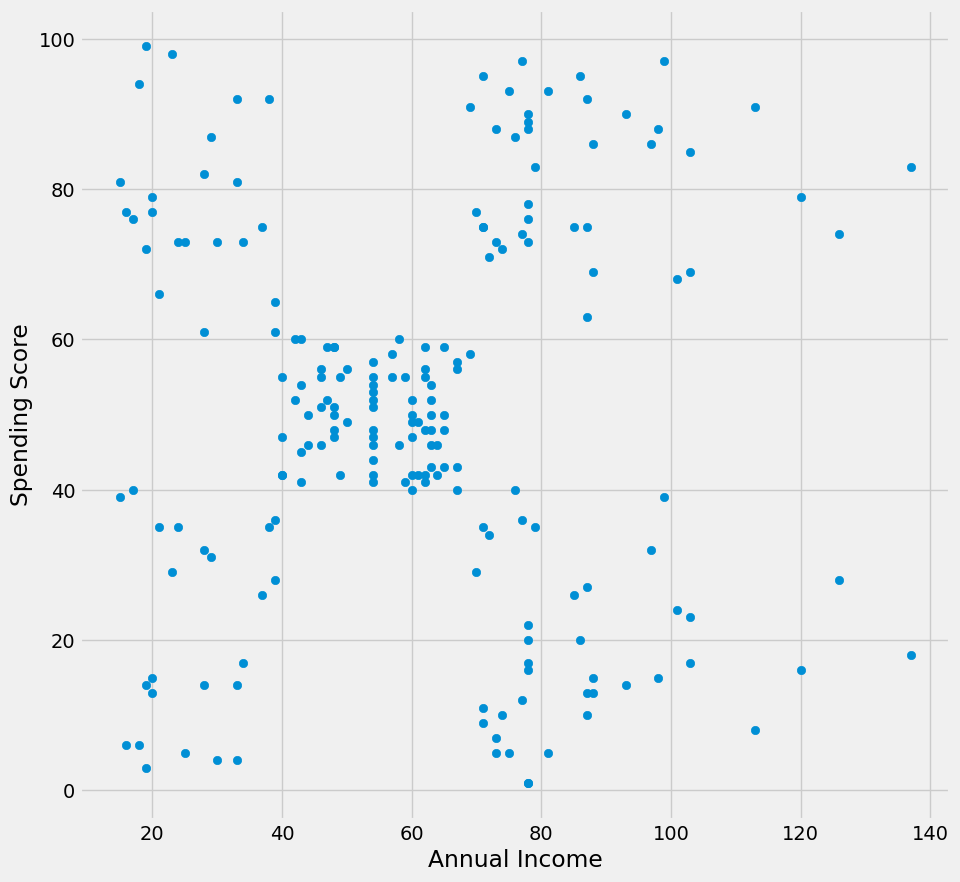

In [13]:
plt.figure(figsize = (10,10))
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

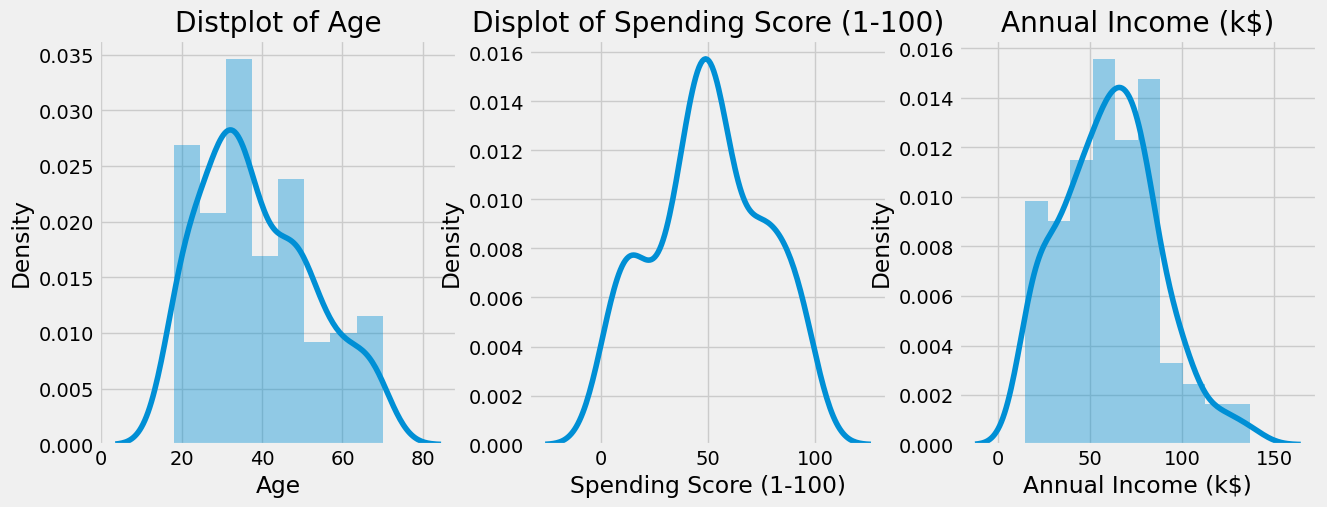

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(dataset['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(dataset['Spending Score (1-100)'],hist=False)
plt.title('Displot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

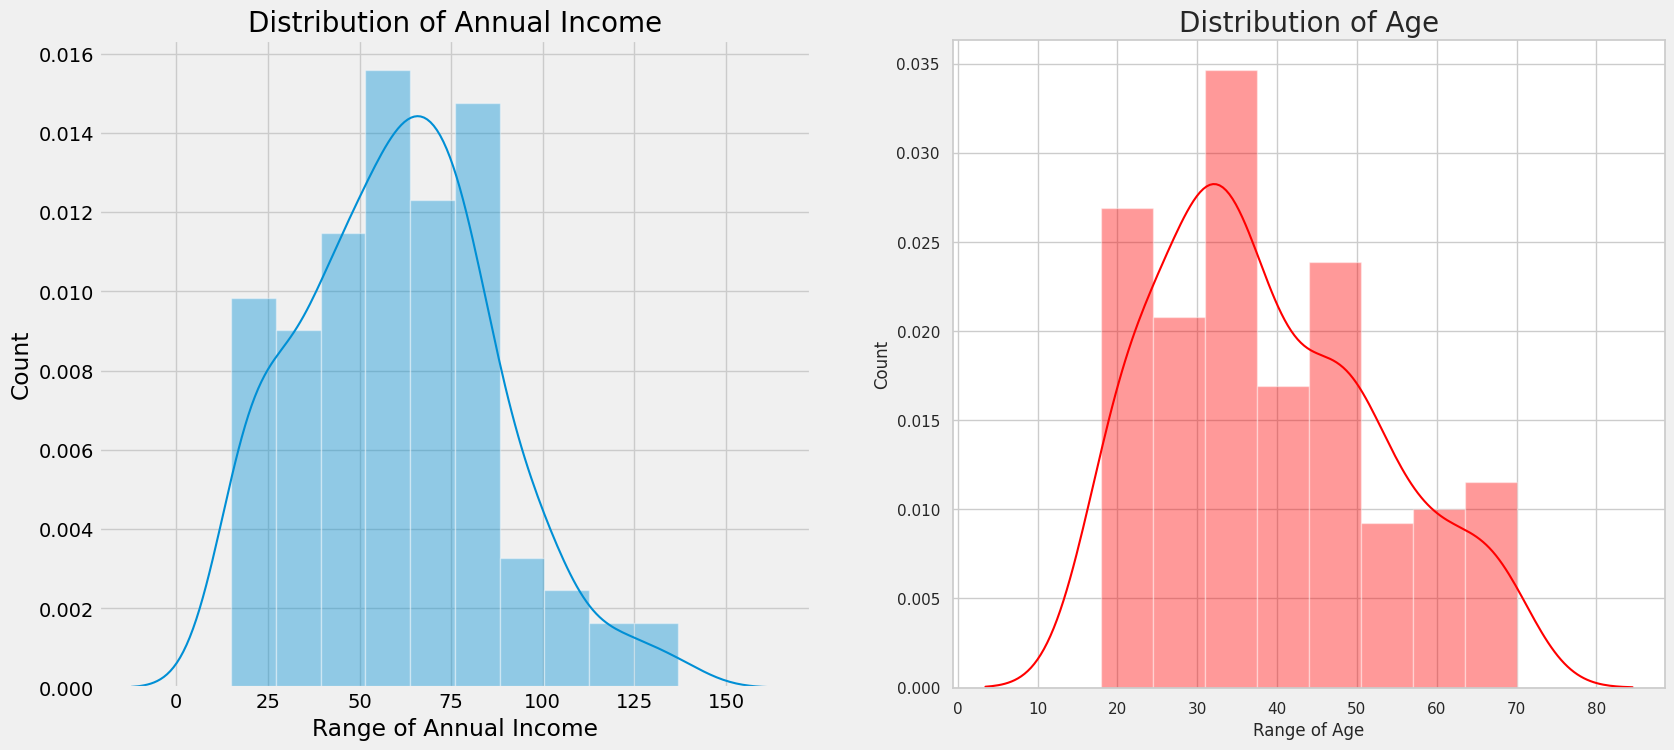

In [15]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income' , fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'] , color = 'red')
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

*Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots.*

*We can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also,we can say that the least Income is around 20 US Dollars*

*Taking inferences about the Customer*

The most regular customer for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngster are lesser in number as compared to the Middle aged people

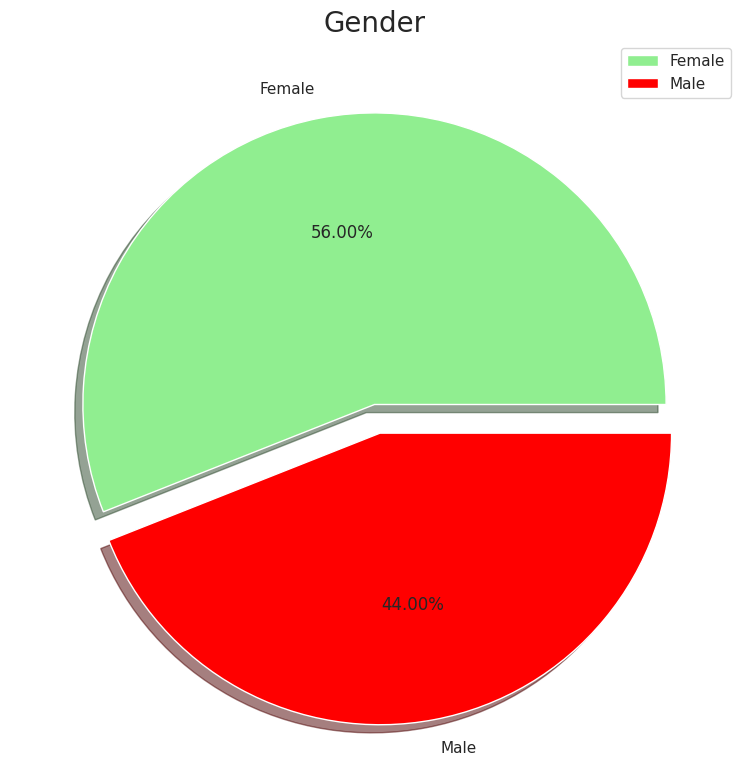

In [16]:
labels = ['Female' , 'Male']
size = dataset['Genre'].value_counts()
colors = ['lightgreen','red']
explode = [0,0.1]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

*By looking at the above pie chart which explain about the distribution of Gender in the Mall*

*Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.*

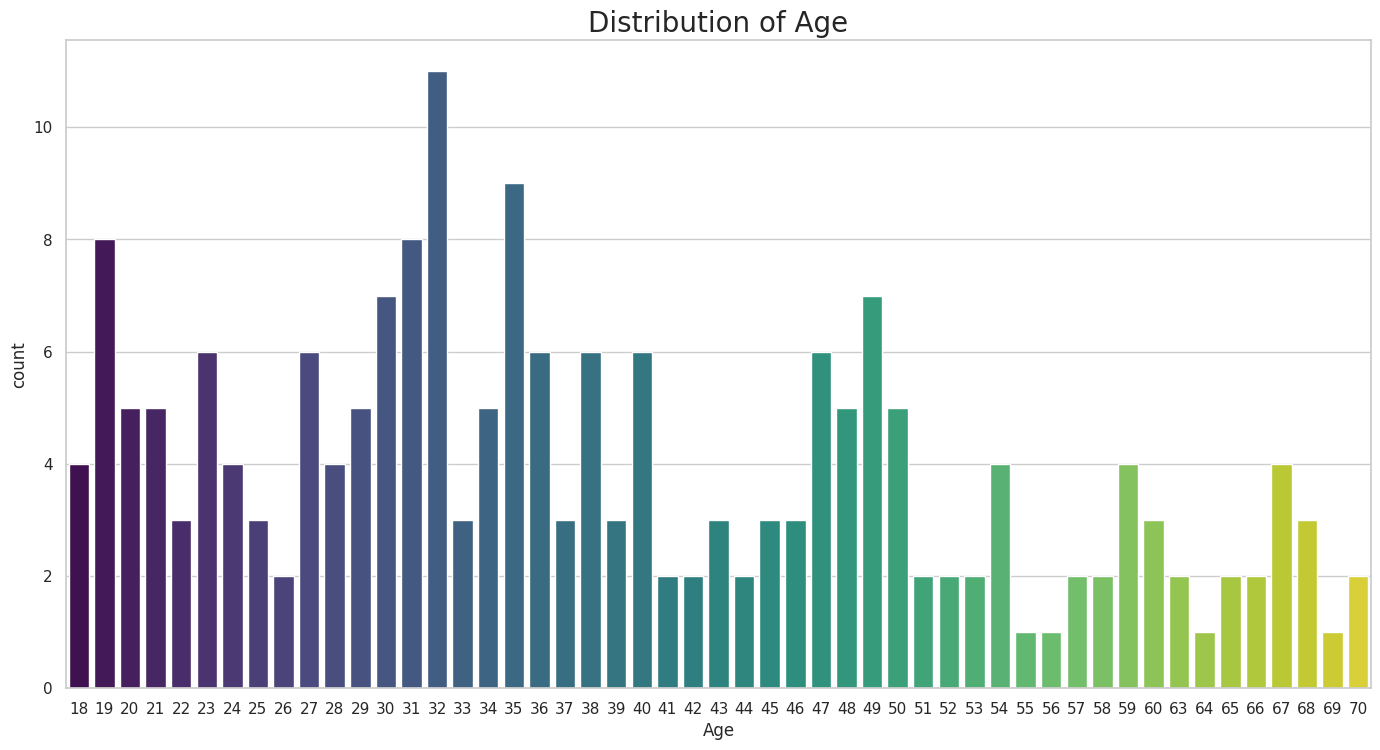

In [22]:
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x=dataset['Age'], data=dataset, palette='viridis')
plt.title('Distribution of Age' , fontsize = 20)
plt.show()

*This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall*

*By looking at the above graph. It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise pattern such as the older age group are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Malls for the Age 18 to 67. People of Age 55,56,69,64 are very less frequent in the Malls. People at age 32 are the Most Frequent Visitors in the Mall.*

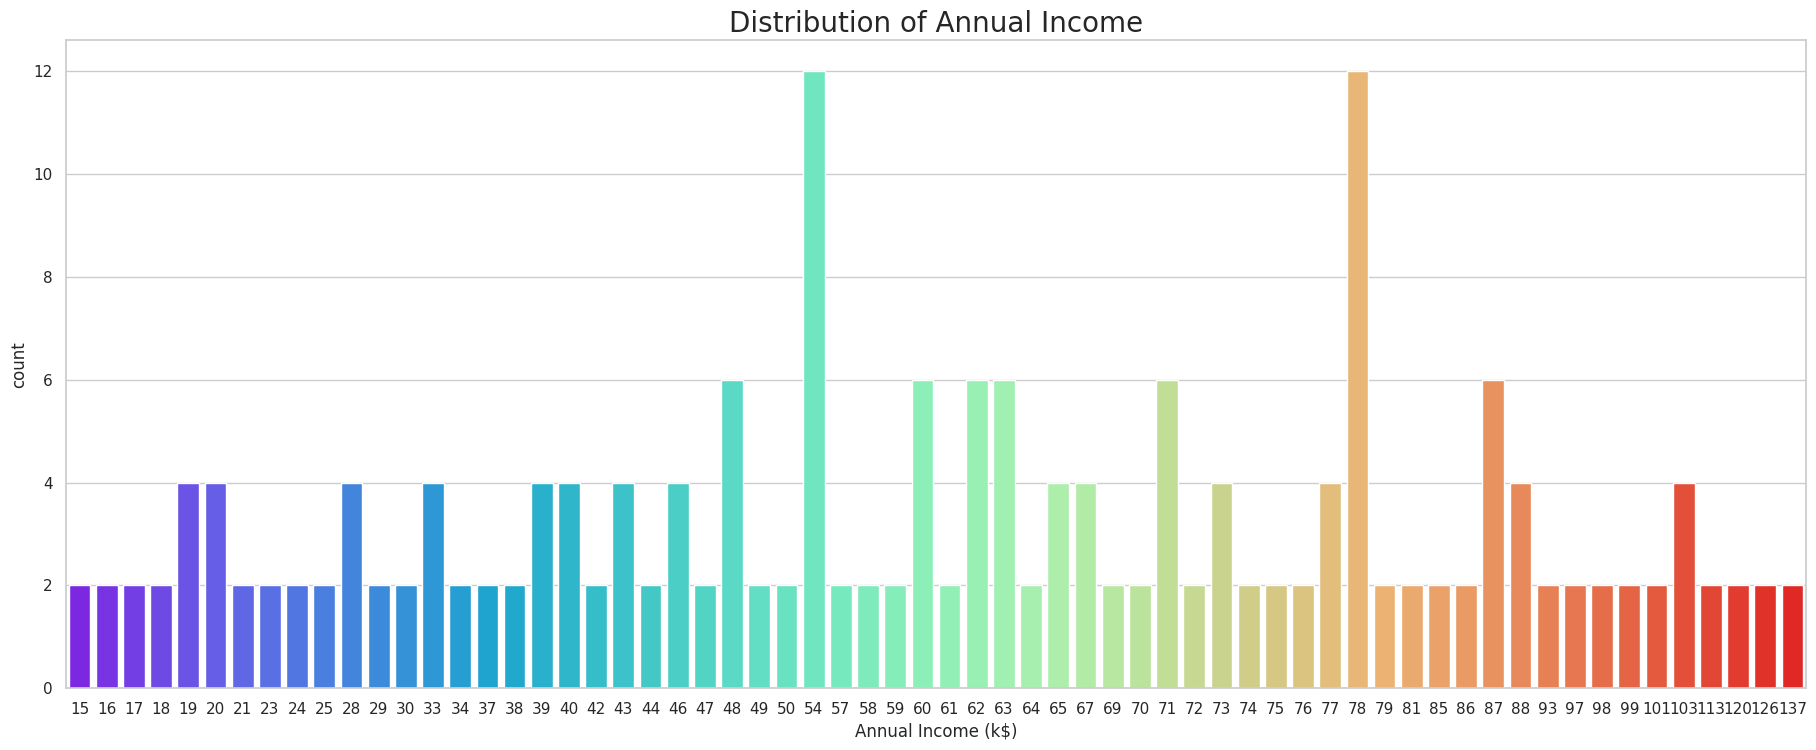

In [23]:
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(x=dataset['Annual Income (k$)'],data=dataset,palette='rainbow')
plt.title('Distribution of Annual Income',fontsize=20)
plt.show()

*Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15 US Dollars to 13K US Dollars. There are more Customers in the
Malls who have their Annual Income as 54K US Dollars or 78 US Dollars.*

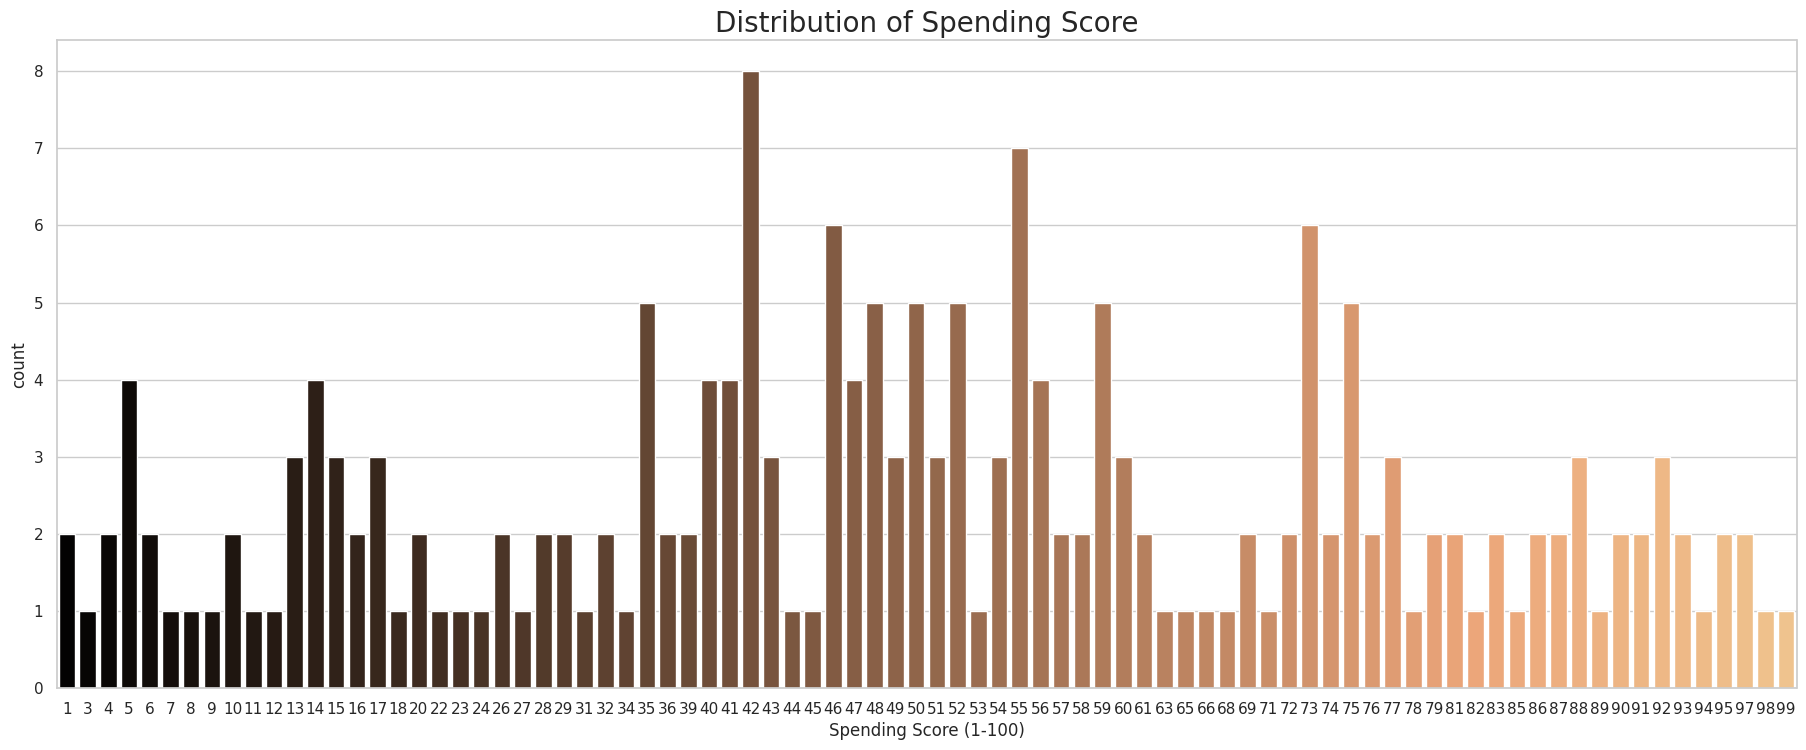

In [24]:
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(x=dataset['Spending Score (1-100)'],data=dataset,palette='copper')
plt.title('Distribution of Spending Score',fontsize=20)
plt.show()

*This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.*

*On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.*

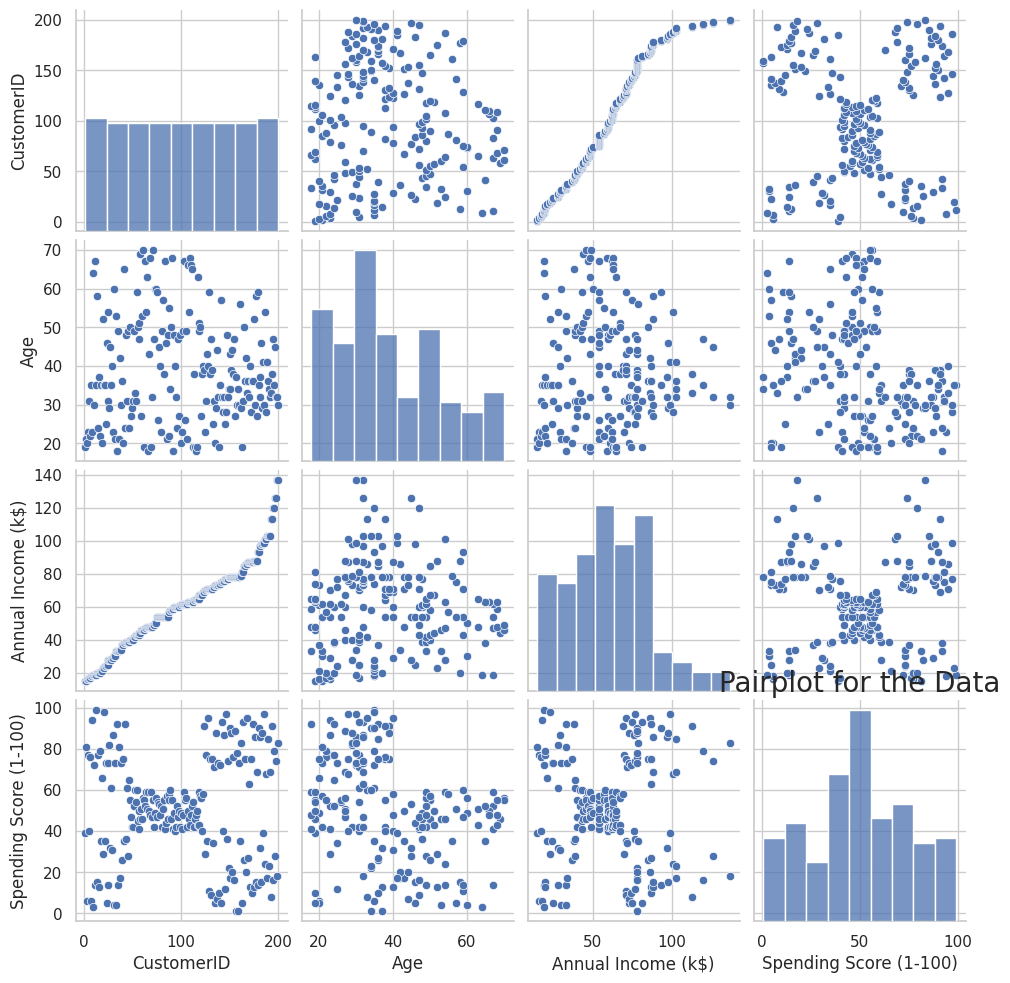

In [25]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data',fontsize=20)
plt.show()

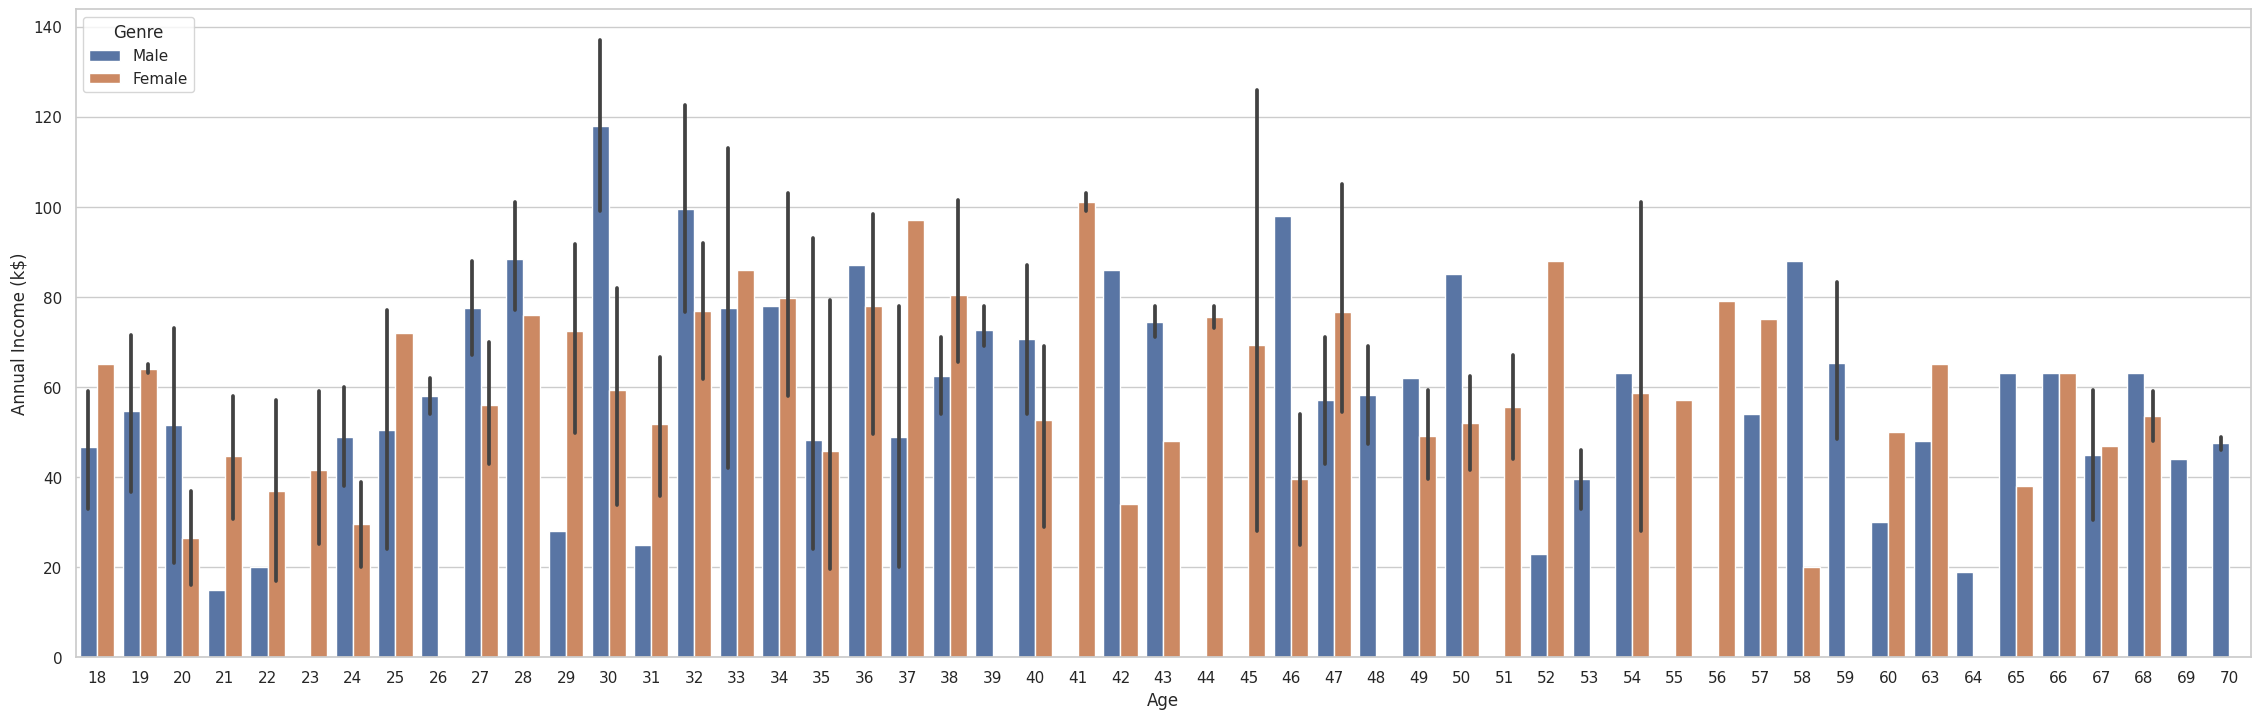

In [26]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)',x='Age',hue='Genre',data=dataset)
plt.show()

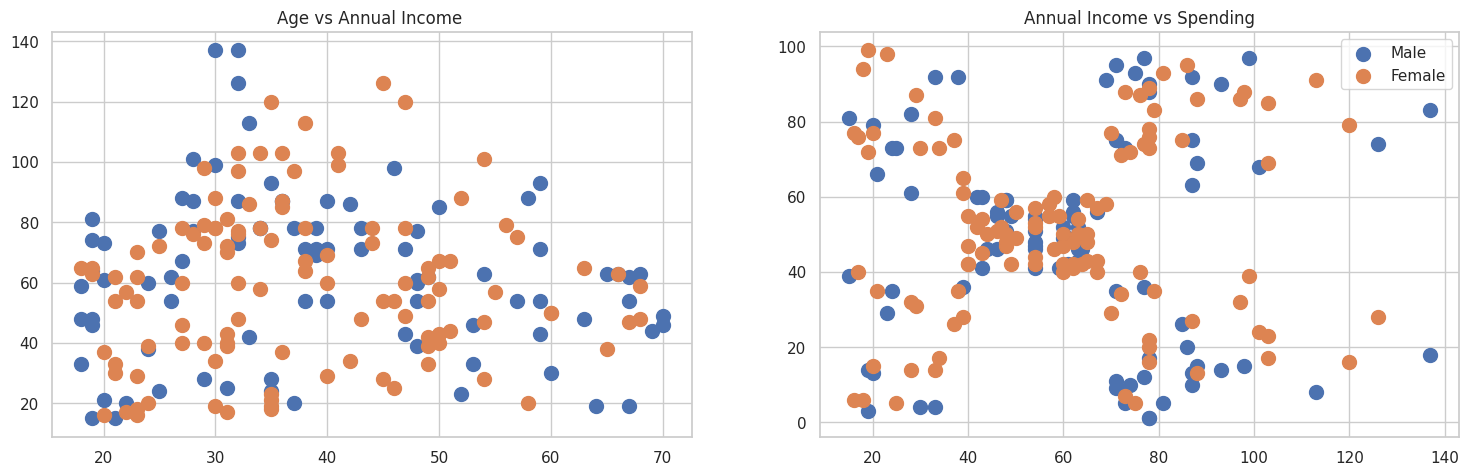

In [28]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Genre'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Genre'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

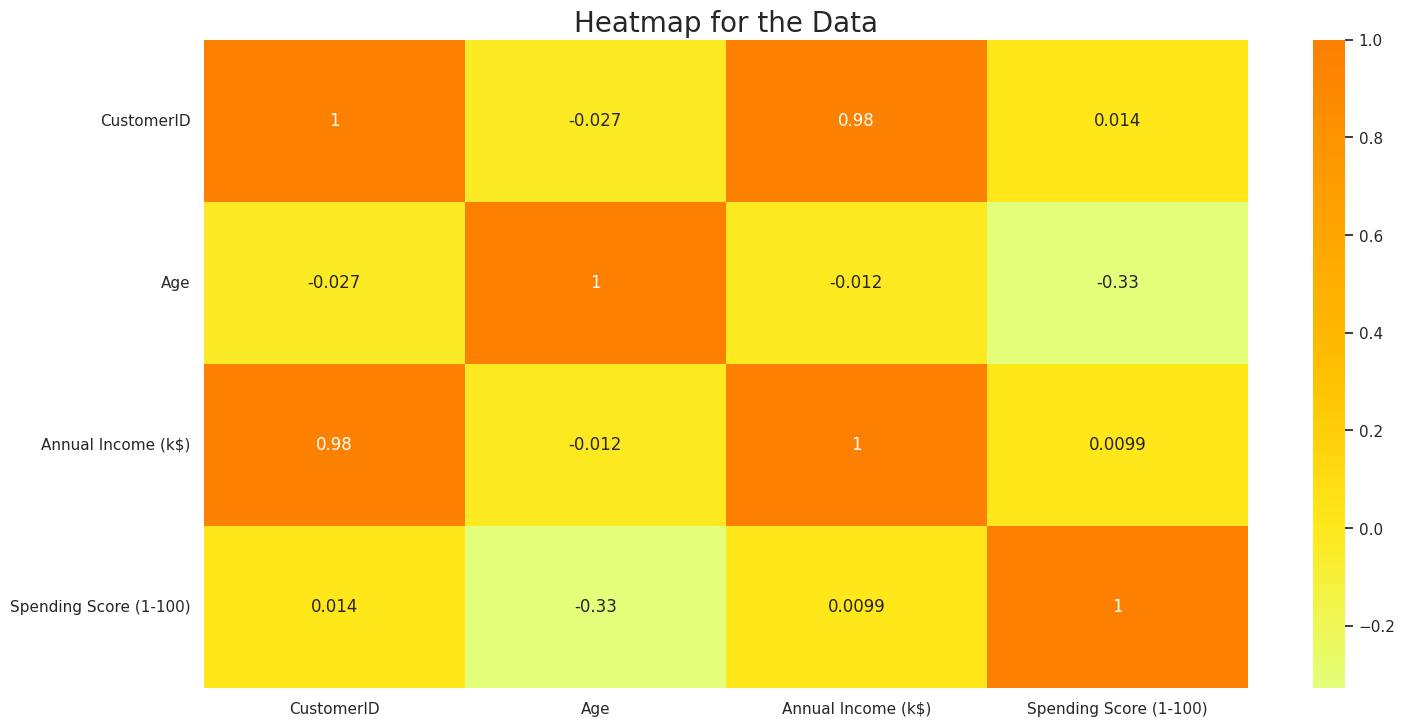

In [29]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(dataset.corr(),cmap='Wistia',annot=True)
plt.title('Heatmap for the Data',fontsize=20)
plt.show()

*The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.*

*We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.*

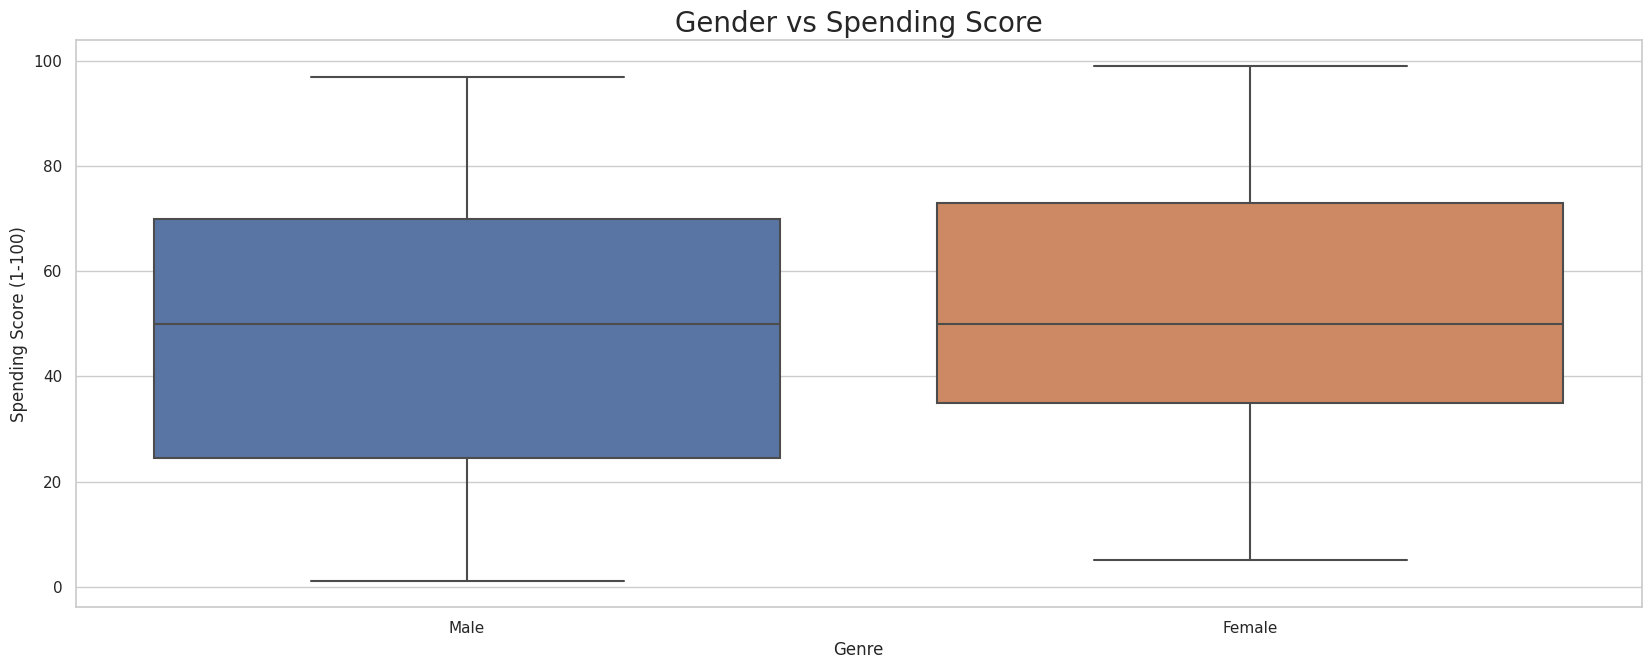

In [32]:
# Gender VS Spendscore

plt.rcParams['figure.figsize']=(18,7)
sns.boxplot(x=dataset['Genre'],y=dataset['Spending Score (1-100)'])
plt.title('Gender vs Spending Score',fontsize = 20)
plt.title('Gender vs Spending Score',fontsize = 20)
plt.show()

**Bi-variate Analysis between Gender and Spending Score**

*It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.*

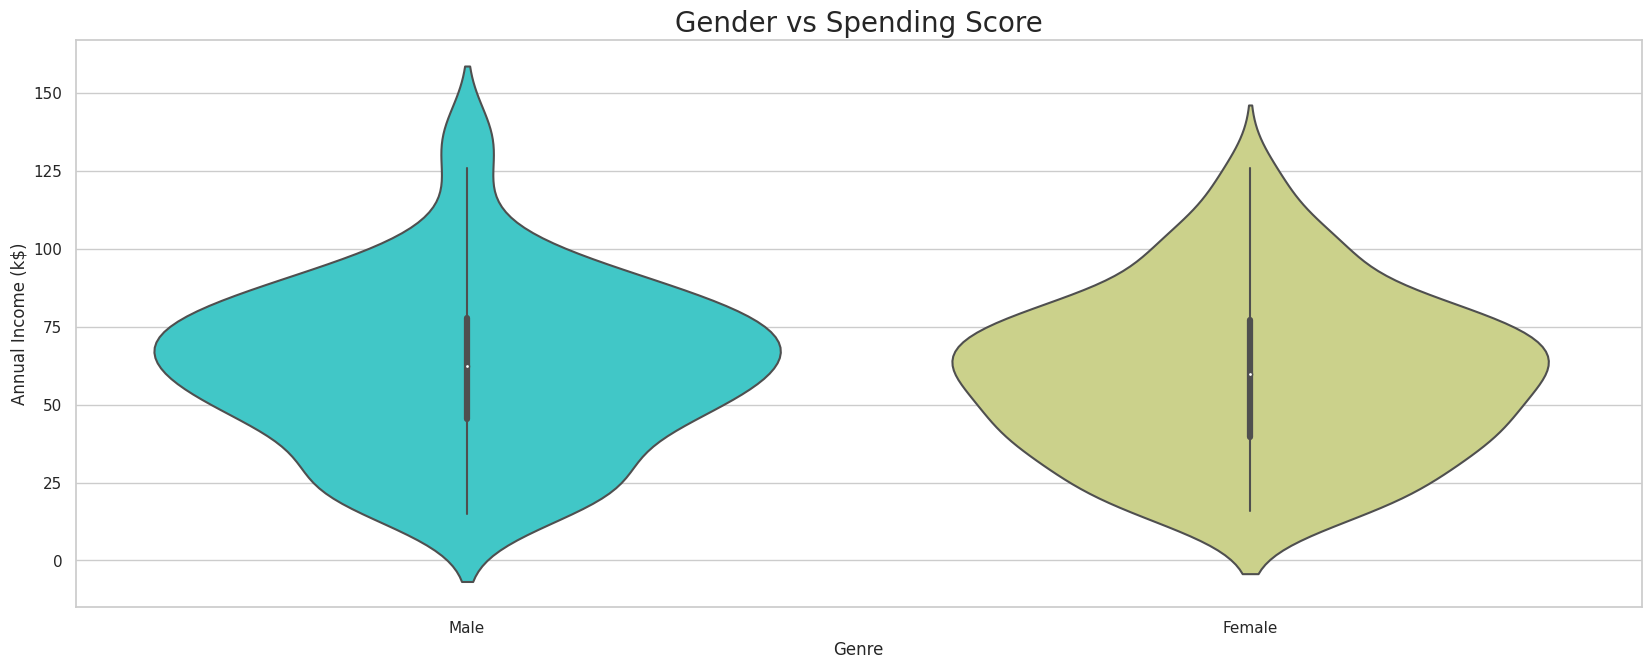

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=dataset['Genre'], y=dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

*Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.*

*There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.*

**K Means Clustering**

*K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:*

*The centroids of the K clusters, which can be used to label new data Labels for the training data (each data point is assigned to a single cluster)*

# The Model Building Process

**Feature Selection for Model Building Purposes**

*Here we will consider only 2 features (Annual income and Spending Score) and no Label Available*

In [35]:
X= dataset.iloc[:, [3,4]].values

In [36]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

# We always assume the max number of cluster would be 15
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

**Visualizing the ELBOW Method to get the Optimal Value of K**

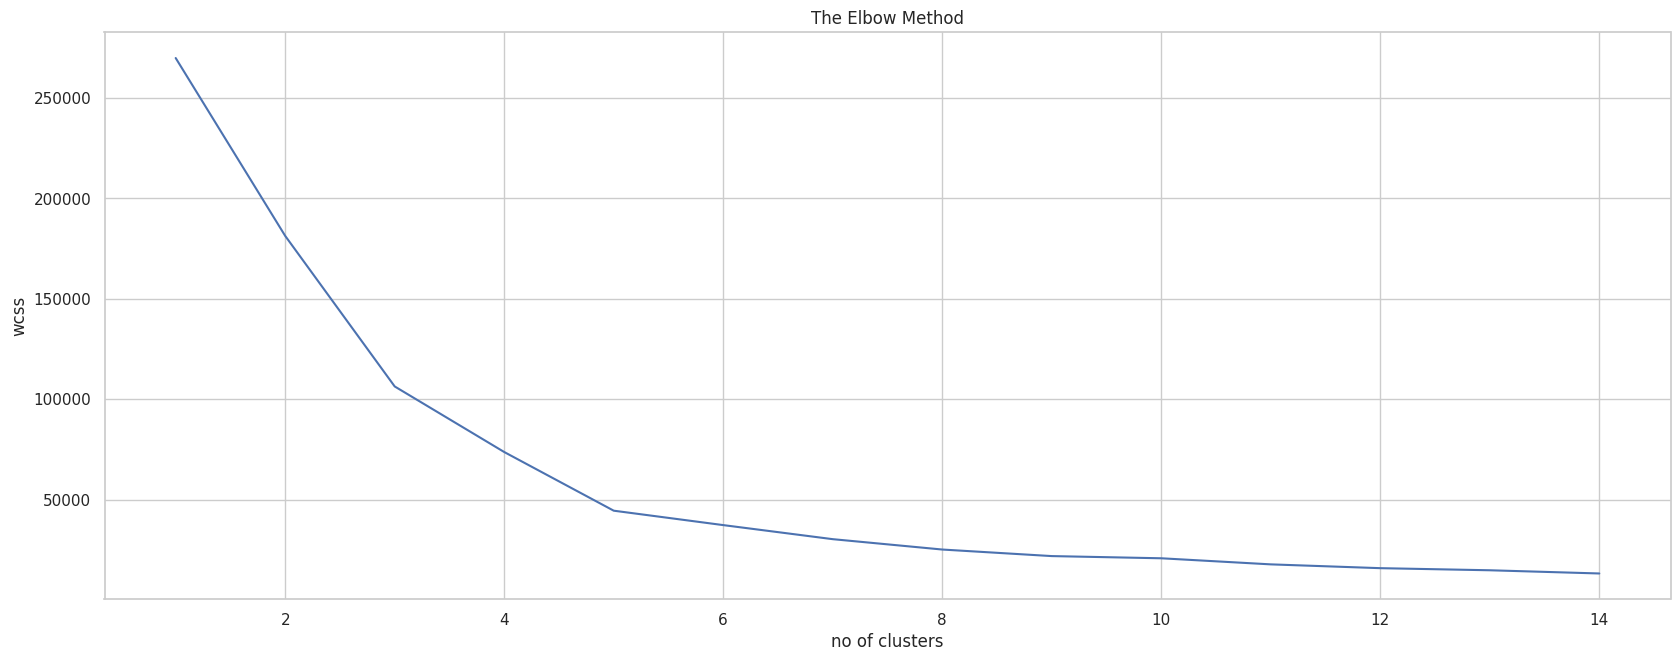

In [40]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

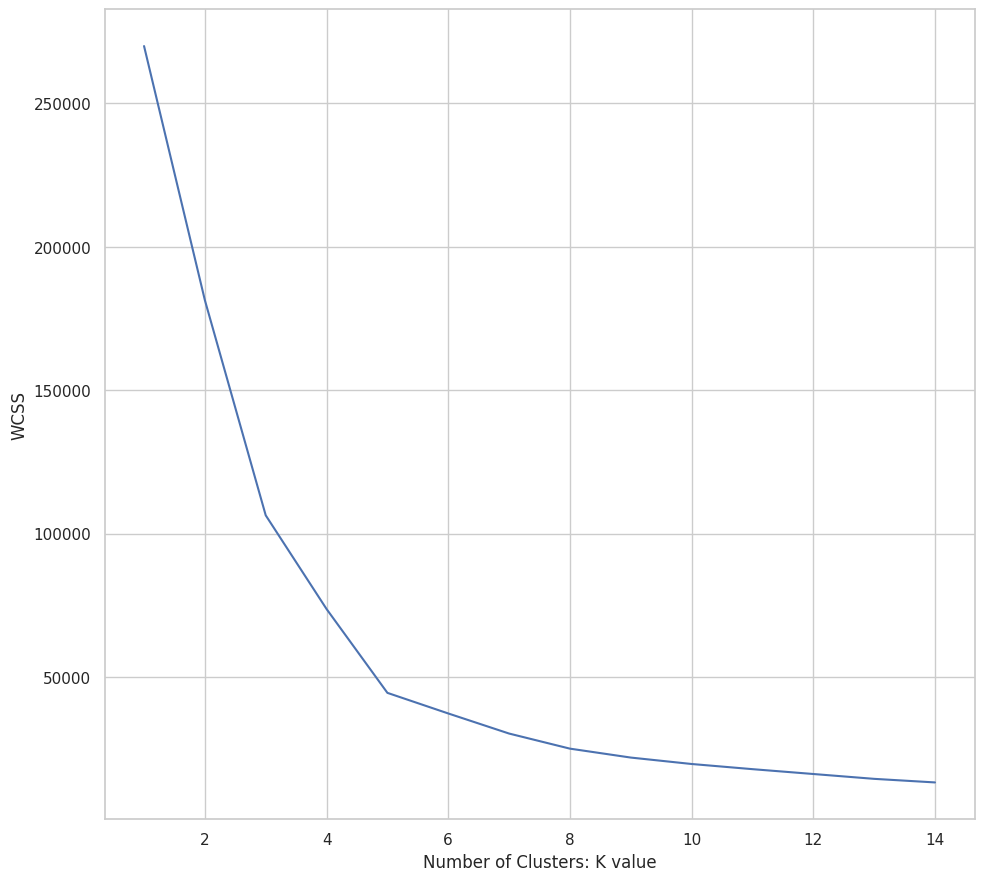

In [41]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1,15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1,15), wcss)
plt.xlabel("Number of Clusters: K value")
plt.ylabel("WCSS")
plt.show()

In [42]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

**Visualizing All the Clusters**

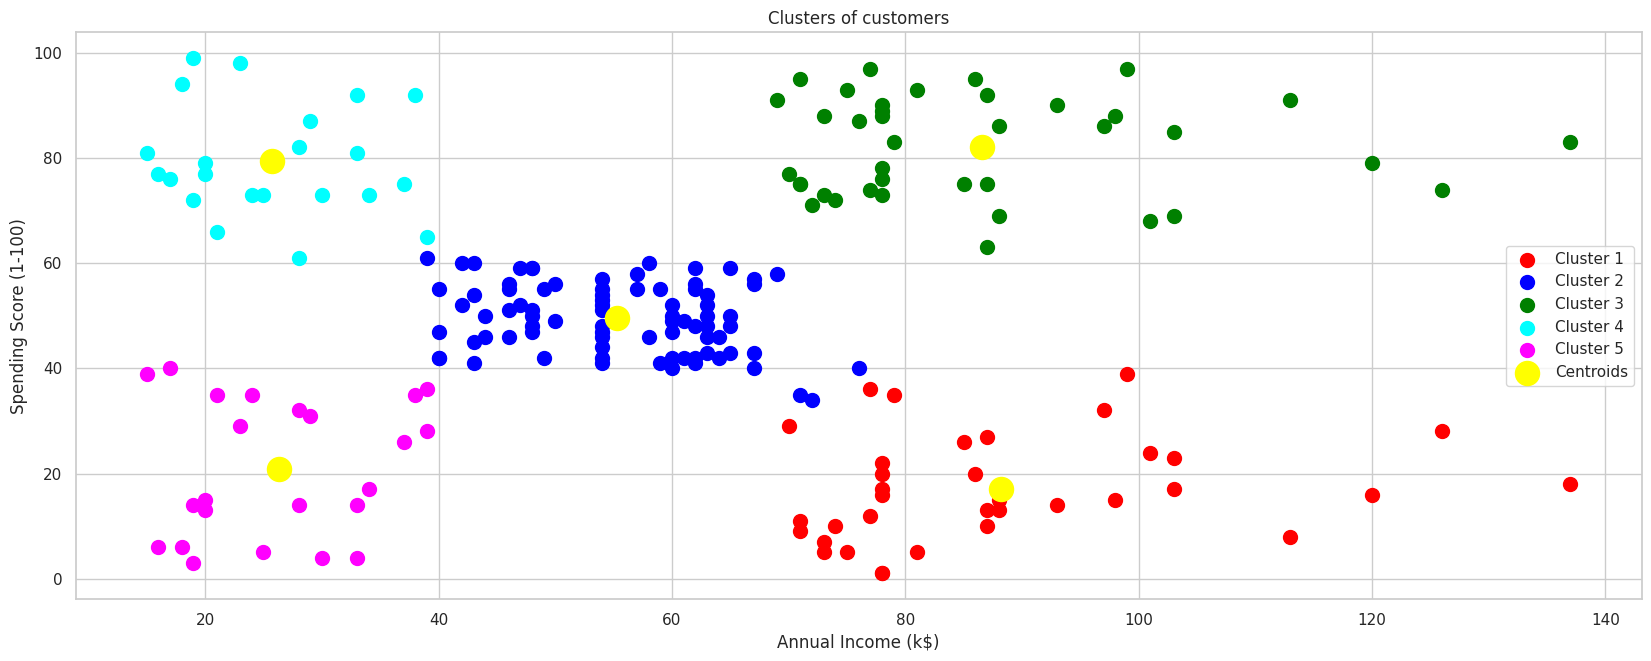

In [43]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

*This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall.*

*There are clearly Five segments of Customers namely Cluster 1, Cluster 2, Cluster 3, Cluster 4, Cluster 5 based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.*

**Model Interpretation**

*Cluster 1 (Red Color) -> earning high but spending less*

*Cluster 2 (Blue Color) -> average in terms of earning and spending*

*Cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]*

*Cluster 4 (Cyan Color) -> earning less but spending more*

*Cluster 5 (Magenta Color) -> Earning less , spending less*

**We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse**

**wherein others we can set like once in a week or once in a month**

#  Hierarchial Clustering

*Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other*

*Hierarchical clustering is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups.*

*The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme. Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes.*

*Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.*

**Using Dendrograms to find the Number of Optimal Clusters**

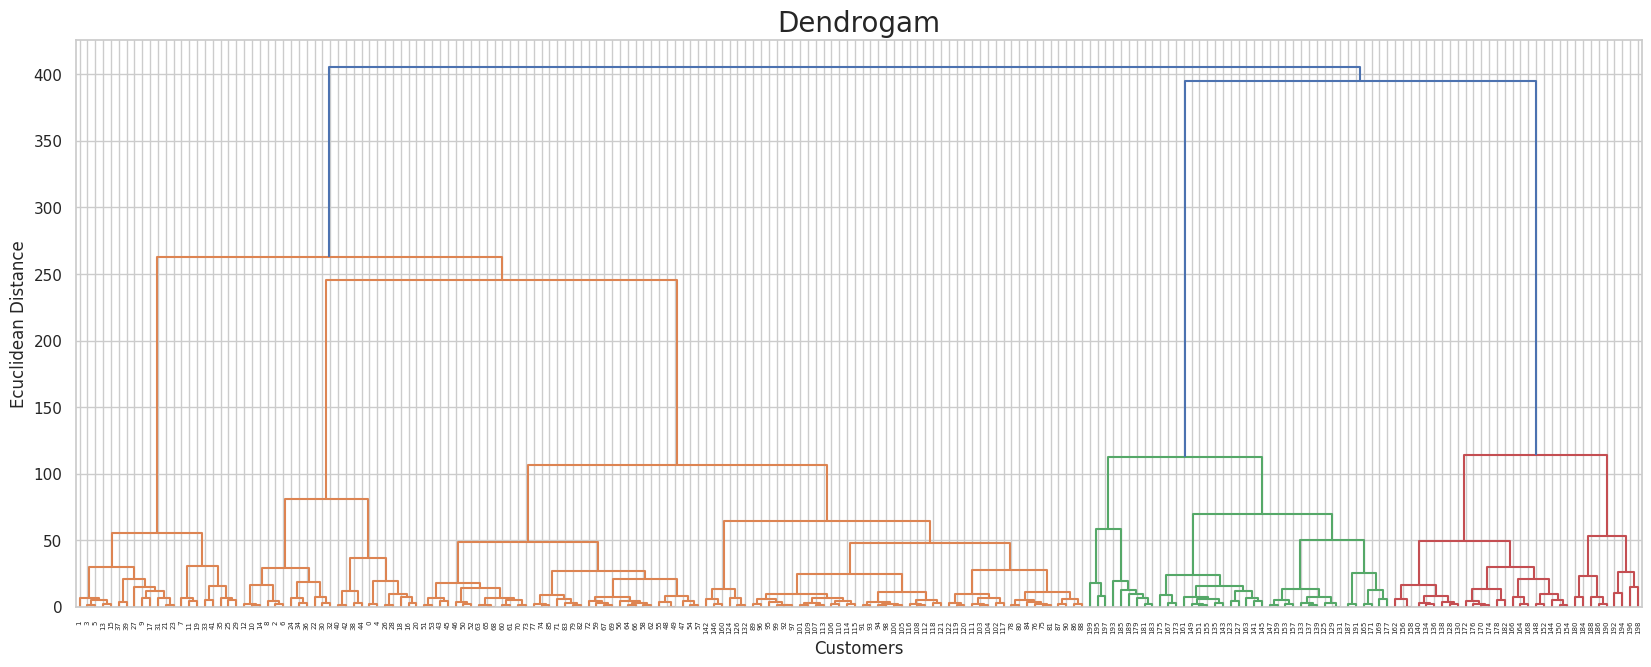

In [44]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

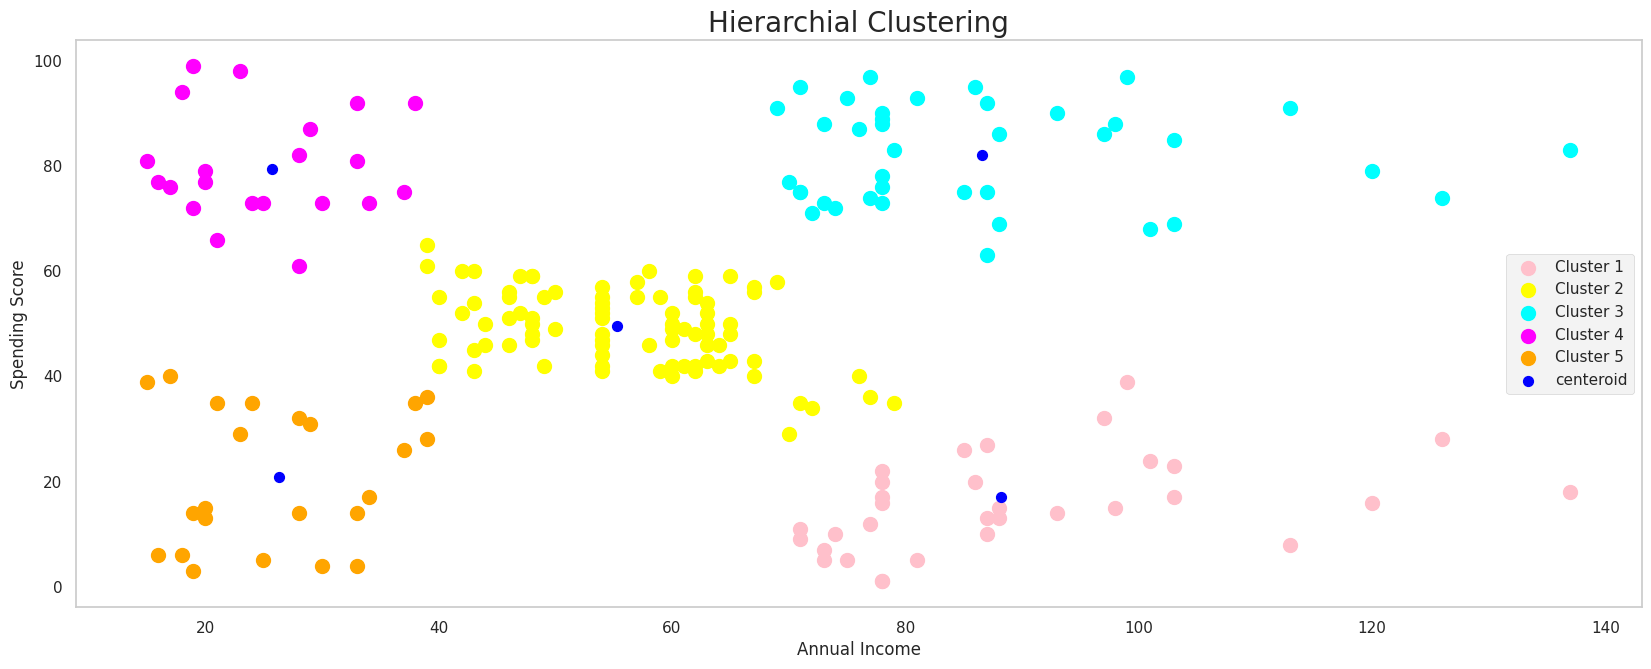

In [46]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Clusters of Customers Based on their Ages**

In [47]:
Y = dataset.iloc[:, [2, 4]].values
Y.shape

(200, 2)

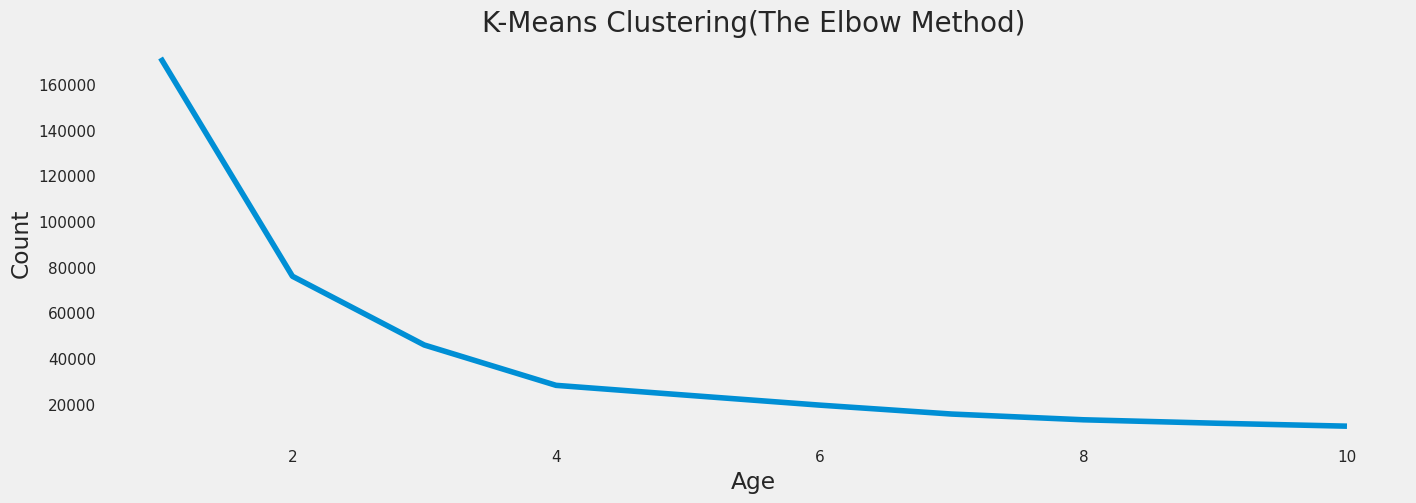

In [48]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

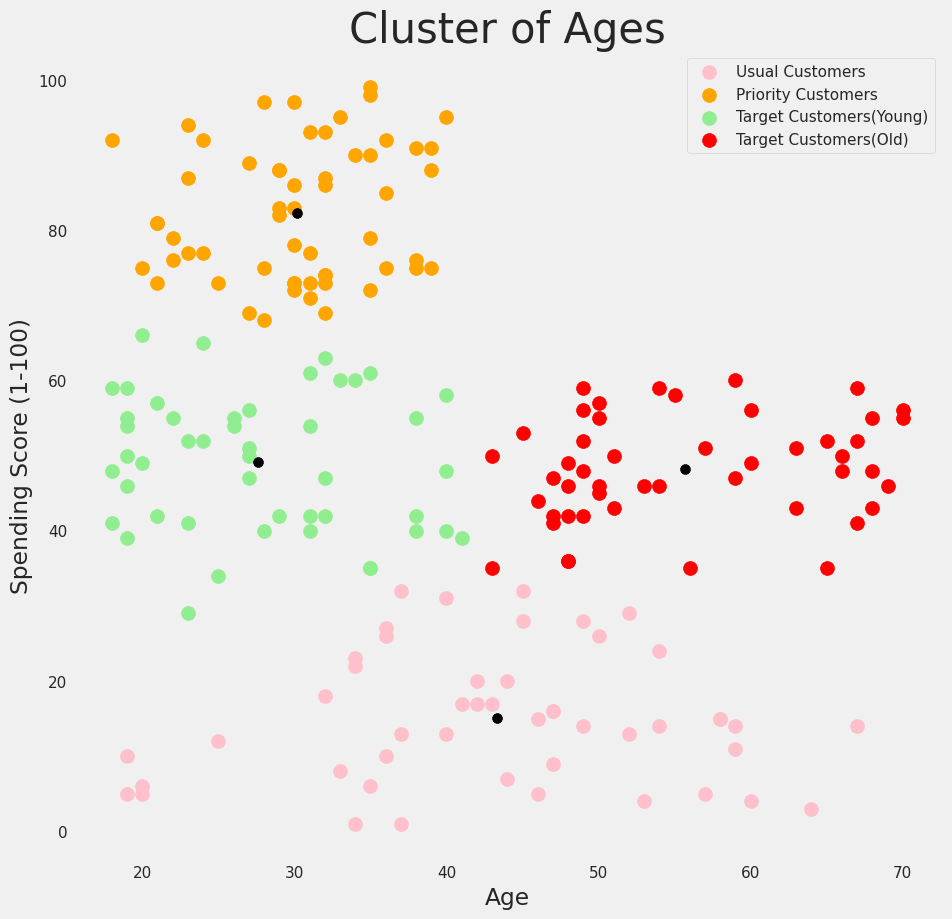

In [49]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(Y)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(Y[ymeans == 0, 0], Y[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(Y[ymeans == 1, 0], Y[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(Y[ymeans == 2, 0], Y[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(Y[ymeans == 3, 0], Y[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

*According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall*

In [51]:
x = dataset[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(Y)
labels = km.labels_
centroids = km.cluster_centers_

In [54]:
dataset['labels'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['labels'],
        size= 10,
        line=dict(
            color= dataset['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)